In [1]:
%load_ext autoreload 
%autoreload 2

import time
import torch
import os
import nltk
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline


In [3]:
ran_state = 42

current_dir = os.getcwd()
data_dir = f'{current_dir}/dataset'
dl_folder = f'{current_dir}/dataset/dl'
destination_folder = f'{current_dir}/results'
filenames = [
    'kant.txt', 
    'aristotle.txt', 
    'plato.txt', 
    'hume.txt',
    'nietzsche.txt'
    ]

[os.path.join(data_dir, file) for file in filenames]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [4]:
from load_data import LoadData, LoadSeqData, LoadSentenceData, LoadLabelSentenceDataloader
corpus = LoadData(n_max=5000, random=True)
corpus.load()
philo_df = corpus.corpus
philo_df = philo_df[['sentence', 'label', 'author', 'tok_lem_sentence']]
philo_df = philo_df.loc[(philo_df.tok_lem_sentence.str.len()<15)]
print(len(philo_df))
philo_df.head()


/home/bettyld/PJ/Documents/NLP_PJ/env/bin/python


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/bettyld/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/bettyld/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/bettyld/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


2799


,sentence,label,author,tok_lem_sentence
0,Out of your seed there may one day arise for m...,4,Nietzsche,"[seed, may, one, day, arise, genuine, son, per..."
1,is not that the true blue romanticist-confessi...,4,Nietzsche,"[true, blue, romanticist, confession, mask, pe..."
2,"I, indeed, for this reason chiefly, sent away ...",2,Plato,"[indeed, reason, chiefly, sent, away, woman, m..."
3,This was touching Charles in a very tender poi...,1,Hume,"[touching, charles, tender, point, honor, cons..."
5,"Then we are agreed after all, said Socrates, t...",2,Plato,"[agreed, said, socrates, opposite, never, case..."


In [5]:
batch_size = 5
num_steps = 200
n_max = 1000

# For vocab
data_iter = LoadSeqData(n_max=n_max, batch_size=batch_size,
                          num_steps=num_steps, min_freq=1)

sentence_iter = LoadSentenceData(n_max=n_max, batch_size=batch_size,
                          num_steps=num_steps, min_freq=1)

vocab = data_iter.vocab

# for i in data_iter:
#     print('X: \n', i[0][:3,:3], ' \n \nY (next token): \n ', i[1][:2,:2])
#     break
    
# for i in sentence_iter:
#     print('X: \n', i[0][:3,:3], ' \n \nY (next token): \n ', i[1][:2,:2])
#     break
    


/home/bettyld/PJ/Documents/NLP_PJ/env/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [6]:
# For classification
from torch.utils.data import Dataset, DataLoader
# without vocab
dataset_sentence = LoadLabelSentenceDataloader(n_max=n_max, vocab=None)
dataloader_sentence = DataLoader(dataset_sentence, batch_size=2,
                        shuffle=True, num_workers=1)

sample, label = next(iter(dataloader_sentence)) #shape is (seqences, batch)
print(np.array(sample).transpose(1,0), label)

# dataset_idx = LoadLabelSentenceDataloader(n_max=n_max, vocab=vocab)
# dataloader_idx = DataLoader(dataset_idx, batch_size=4,
#                         shuffle=True, num_workers=4)

# print(next(iter(dataloader_idx)))


[['spirited' 'tender' 'emotion' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>'
  '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>'
  '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>'
  '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>'
  '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>'
  '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>'
  '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>'
  '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>'
  '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>'
  '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>'
  '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>' '<pad>'
  '<pad>' '<pad>']
 ['critique' 'cognitive' 'faculty' 'regard' 'furnish' 'priori' 'properly'
  'speaking' 'realm' 'respect' 'object' 'doctrine' 'investigate'
  'whether' 'accordance' 'stat

In [7]:
print(vocab)
print(list(vocab.items())[:5])

Dictionary(2455 unique tokens: ['abandon', 'abandoning', 'abandonment', 'abasement', 'ability']...)
[(2453, 'abandon'), (2454, 'abandoning'), (2, 'abandonment'), (3, 'abasement'), (4, 'ability')]


In [8]:
print(vocab[3])
print(vocab.id2token[3])
print(vocab.token2id['ability'])
# print(vocab.cfs) # collections frequency

abasement
abasement
4


In [9]:
# if all document doesn't fit in memory, we can use yield. However it cannot be used with TF IDF, so we may use HashingVectorizer. 

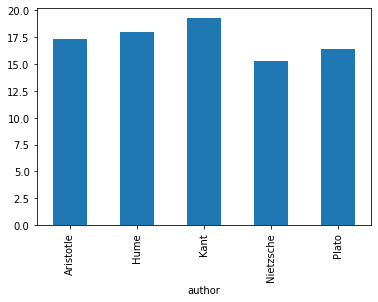

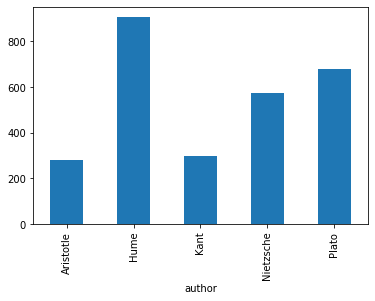

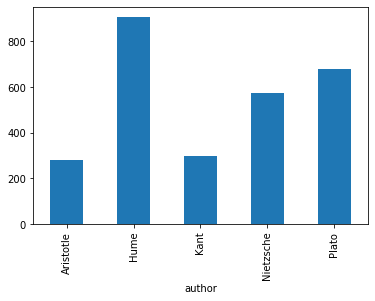

author
Aristotle    3.0
Hume         1.0
Kant         0.0
Nietzsche    4.0
Plato        2.0
Name: label, dtype: float64

In [10]:
df_nan = philo_df.isna()
# print(df_nan.sum())

# print(philo_df.describe())

philo_df['word_counter'] = philo_df['sentence'].apply(lambda x: x.count(' '))


philo_df.groupby('author')['word_counter'].mean().plot.bar()
plt.show()
philo_df.groupby('author')['label'].count().plot.bar()
plt.show()

philo_df.groupby('author')['label'].size().plot.bar()
plt.show()

philo_df.groupby('author')['label'].mean()

# Vocabulary
The string type of the token is inconvenient to be used by models, which take numerical inputs. Now let us build a dictionary, often called vocabulary as well, to map string tokens into numerical indices starting from 0. To do so, we first count the unique tokens in all the documents from the training set, namely a corpus, and then assign a numerical index to each unique token according to its frequency. Rarely appeared tokens are often removed to reduce the complexity. Any token that does not exist in the corpus or has been removed is mapped into a special unknown token “<unk>”. We optionally add a list of reserved tokens, such as “<pad>” for padding, “<bos>” to present the beginning for a sequence, and “<eos>” for the end of a sequence.
https://d2l.ai/chapter_recurrent-neural-networks/text-preprocessing.html
    



# Zipf Law
when we plot the word (log scaled) frequency, we notice the Zipf's law.
It states that the frequency $n_i$ of the the ith most frquent word is 
$n \propto \frac{1}{i^{\alpha}}$
equivalent to 
$log n_i = - \alpha log(i) + c$. 
With $\alpha$ the exponent that charecterize the distribution.
The alpha can be seen in graph below with the linear relationship ith both log scale with slope $\alpha$

top 10 fqt idx: [(1241, 411), (1478, 310), (467, 281), (1440, 220), (852, 178), (2204, 168), (1503, 140), (1706, 132), (1860, 132), (1435, 131)]
411


Text(0, 0.5, 'fqcy n(x)')

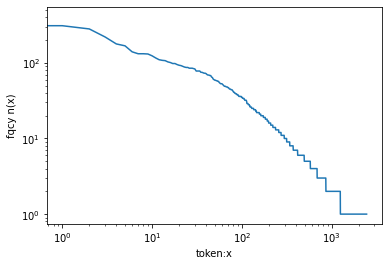

In [11]:
# Print most frequent
top_fqcy = sorted(vocab.cfs.items(), key=lambda x: x[1], reverse=True)
print('top 10 fqt idx:', top_fqcy[:10])
# plot most frequent
freqs = np.array([freq for idx, freq in top_fqcy])

x = [[]] * len(freqs)
print(freqs[0])
fig, axes = plt.subplots()
axes.plot(freqs)
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlabel('token:x')
axes.set_ylabel('fqcy n(x)')

Text(0, 0.5, 'fqcy n(x)')

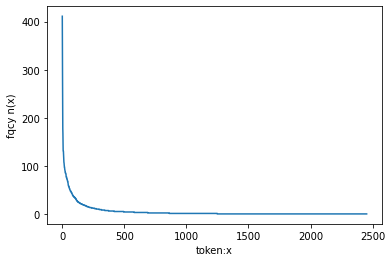

In [12]:
# without log scale
fig, axes = plt.subplots()
axes.plot(freqs)
axes.set_xlabel('token:x')
axes.set_ylabel('fqcy n(x)')


# HashingVectorizer
Convert a collection of text documents to a matrix of token occurrences

Adv:
- can be used in streaming without fitting all memory in space

Cons:
 - cannot compute inverse transform
 - collision might exists between two distinct tokens

In [13]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import SGDClassifier

from clean_data import tokenizer

dataset_sentence = LoadLabelSentenceDataloader(n_max=n_max, vocab=None)
dataloader_sentence = DataLoader(dataset_sentence, batch_size=2,
                        shuffle=True, num_workers=1)

vect = HashingVectorizer(decode_error='ignore', n_features=2**21, preprocessor=None, tokenizer=tokenizer)
clf = SGDClassifier(loss='log')

sample, label = next(iter(dataloader_sentence)) #shape is (seqences, batch)
sample = [' '.join(list(x)) for x in np.array(sample).transpose(1,0)]
sample = [x[:x.find('<pad>')] for x in sample]
      
# Training
for batch in dataloader_sentence:
    X_train, y_train = batch # 1000 sentences per batch
    y_train = y_train.cpu().numpy()
    X_train = [' '.join(list(x)) for x in np.array(X_train).transpose(1,0)]
    X_train = [x[:x.find('<pad>')] for x in X_train]
#     if not X_train:
#         break
    X_train = vect.partial_fit(X_train)
#     clf.partial_fit(X_train, y_train, classes=y_train)

# Evaluation
X_test = vect.transform(sample)
sample, X_test.shape

(['secondly although object intellectual satisfaction far compatible aesthetical satisfaction rest upon interest yet difficult unite meant produce interest ',
  'part field knowledge possible u ground territory concept requisite cognitive faculty '],
 (2, 2097152))

# Spacy tokenazier
SpaCy is is a free, open-source library for advanced Natural Language Processing (NLP) in Python.

When you ``load`` a trained pipeline, you retrieve a Langage object ``nlp``. It can be used to process text.
When you call it on a string or text, it return a ``spacy.tokens.doc.Doc`` which print like a string. 
This Doc object is made of token objects that has many interesting attributes like lemma_ or text_.

You can compute the 300-dim embedding vector of a token (single word) or a Doc (several tokens).
What to expect from similarity? The Doc (text) vector is an __average__ of the token vectors. Let's be careful, the average of "fast" and "food" is maybe not related to the vector of "fast food". Plus averaging means that the vector is insensitive to the order. 

In [78]:
import spacy
# !python -m spacy download en_core_web_lg
# !python -m spacy download en_core_web_sm

nlp = spacy.load("en_core_web_lg") # lg: embed size 300, sm 96
philo_df['spacy_sentence'] = philo_df['tok_lem_sentence'].apply(lambda x: nlp(' '.join(x))) # calling nlp on a string and spaCy tokenizes the text and creates a document object
# philo_df['spacy_sentence'] = philo_df['sentence'].apply(lambda x: nlp(x)) # calling nlp on a string and spaCy tokenizes the text and creates a document object

philo_df.head()
# print(philo_df.spacy_sentence[0])

,sentence,label,author,tok_lem_sentence,word_counter,spacy_sentence,spacy_vec,spacy_lemma
0,": And if he is ignorant of the true nature of any subject, how can he detect the greater or less degree of likeness in other things to that of which by the hypothesis he is ignorant?",2,Plato,"[ignorant, true, nature, subject, detect, greater, le, degree, likeness, thing, hypothesis, ignorant]",36,"(ignorant, true, nature, subject, detect, greater, le, degree, likeness, thing, hypothesis, ignorant)","[0.40486178, -0.36614084, 0.37219784, -0.3221185, 0.30738592, -0.44024655, -0.2543513, 0.027214825, -0.37158096, 0.021208355, 0.30751374, -0.46902272, -0.2897872, -0.08790767, -0.24417698, 0.49229646, 0.10760862, 0.19679646, -0.43937492, -0.15010072, -0.24016617, -0.180326, 0.016921839, 0.07039457, 0.35148454, -0.4299773, 0.15666187, -0.74829453, 0.18433349, -0.4535291, 0.20949043, -0.023405293, -0.20209666, -0.42113903, 0.062287588, -0.28217116, -0.034974042, 0.0021278684, 0.3468447, 0.6217...","[ignorant, true, nature, subject, detect, great, le, degree, likeness, thing, hypothesis, ignorant]"
1,How difficult it is to live when one feels that the judgment of many millenniums is around one and against one.,4,Nietzsche,"[difficult, live, one, feel, judgment, many, millennium, around, one, one]",20,"(difficult, live, one, feel, judgment, many, millennium, around, one, one)","[0.43366593, -0.045003366, 0.24769458, -0.07764052, 0.20289138, -0.01859424, -0.446595, -0.09735853, 0.033735696, 0.2219511, 0.20775025, -0.34002078, -0.1546911, -0.15723296, 0.12667036, 0.21296768, 0.38527957, 0.09174984, -0.23007223, 0.10318323, 0.28254265, -0.36690277, 0.05332476, 0.21135846, -0.384821, -0.16092597, 0.15699658, -0.33921355, 0.19099432, 0.30395257, 0.17297605, -0.019083256, -0.14566092, -0.51299405, 0.5060071, -0.2519725, 0.11804686, -0.42742634, 0.011365366, 0.2608221, -0...","[difficult, live, one, feel, judgment, many, millennium, around, one, one]"
3,Could the Greeks have been so far from this taste?,4,Nietzsche,"[could, greek, far, taste]",9,"(could, greek, far, taste)","[0.15901656, -0.6924094, 0.29786998, 0.23582529, -0.35064542, 0.014577821, -0.20110106, -0.8748584, 0.20952965, -0.22000115, -0.116230525, -0.34819508, 0.24886188, -0.47530597, -0.29807496, 0.4677866, -0.29582167, 0.16385444, -0.07253879, -0.2673233, -0.537614, -0.38782805, -0.5225043, 0.30611065, 0.1615488, -0.1805679, -0.3319678, -0.3876356, 0.43656152, 0.40726706, 0.72386956, 0.15501639, 0.32982123, -0.5971683, -0.027724907, 1.0145193, 0.27167016, -0.11597262, -0.23725224, 0.27231845, -0....","[could, greek, far, taste]"
5,"Camden in Kennet, p. 370.",1,Hume,"[camden, kennet]",5,"(camden, kennet)","[0.43459302, -0.49625978, -0.12538071, 0.1601573, 0.12571287, -0.94507074, -0.7566395, 0.6473205, -0.26841527, -0.14097515, 0.9711789, 0.098637484, -0.010471657, 0.34757525, -0.710888, -0.24607223, 0.20424227, 0.56285965, -0.97099483, -0.1978049, -0.29701406, -0.22252682, -0.43253788, -0.20958778, 0.39100164, -0.041761085, 0.16136973, -0.33990282, 0.6645984, -0.13547558, 0.6110951, -0.1722965, -0.4350218, -0.28024974, 0.49456906, -0.059958488, -0.7902836, 0.8799825, 0.44480076, 0.29550588, -...","[camden, kennet]"
6,"Then, Polus, rhetoric would indeed be useful.",2,Plato,"[polus, rhetoric, would, indeed, useful]",6,"(polus, rhetoric, would, indeed, useful)","[0.1299798, -0.6403613, 0.15629466, 0.13236332, 0.14594126, -0.5234644, -0.04918263, -0.64256227, 0.34493083, -0.23386168, 0.23349285, -0.11540687, -0.15249872, 0.39231035, 0.2280343, 0.3029613, -0.5290116, -0.051688682, -0.20464623, -0.017519515, 0.2461159, 0.0032780766, -0.2076979, 0.641794, 0.19670661, -0.2704021, -0.010725236, -0.8522692, -0.24353209, -0.4101469, -0.017258048, -0.077183254, 0.013977659, -0.6957202, -0.16810043, 0.14530233, -0.07856076, -0.15887973, 0.046776224, 0.3952530...","[polus, rhetoric, would, indeed, useful]"


In [79]:
# Create token docs
token_docs = nlp(philo_df['sentence'].iloc[0].lower())
print('sum', token_docs.vector.sum())
token_docs.text, token_docs.vector.shape, token_docs.vector[0]

sum 0.24621534


(': and if he is ignorant of the true nature of any subject, how can he detect the greater or less degree of likeness in other things to that of which by the hypothesis he is ignorant?',
 (300,),
 -0.07541454)

In [80]:
nlp.vocab.strings['cat']

5439657043933447811

In [81]:
# create sentence vectors
philo_df['spacy_vec'] = philo_df['spacy_sentence'].apply(lambda x: np.array(x.vector))

philo_df['spacy_lemma'] = philo_df['spacy_sentence'].apply(lambda x: np.array([t.lemma_ for t in x]))

philo_df['spacy_vec'] = philo_df['spacy_vec'].to_numpy()
philo_df


,sentence,label,author,tok_lem_sentence,word_counter,spacy_sentence,spacy_vec,spacy_lemma
0,": And if he is ignorant of the true nature of any subject, how can he detect the greater or less degree of likeness in other things to that of which by the hypothesis he is ignorant?",2,Plato,"[ignorant, true, nature, subject, detect, greater, le, degree, likeness, thing, hypothesis, ignorant]",36,"(ignorant, true, nature, subject, detect, greater, le, degree, likeness, thing, hypothesis, ignorant)","[-0.28774574, 0.0020924807, -0.17043452, -0.1309046, -0.13204491, 0.061930668, 0.11495101, 0.014769167, -0.10248736, 1.8797125, -0.07242262, 0.10370258, -0.09516, 0.13188933, -0.031095913, 0.0014192375, -0.29048327, 1.0561742, -0.10327966, 0.030720152, 0.023347998, -0.27424282, -0.069059916, -0.08104218, 0.16650352, -0.078437164, 0.18429618, 0.15429668, -0.016270844, 0.17747809, -0.14687149, 0.36033082, 0.07301765, 0.006503504, 0.00801875, -0.02560941, -0.105939, 0.060695007, -0.12637615, -0...","[ignorant, true, nature, subject, detect, great, le, degree, likeness, thing, hypothesis, ignorant]"
1,How difficult it is to live when one feels that the judgment of many millenniums is around one and against one.,4,Nietzsche,"[difficult, live, one, feel, judgment, many, millennium, around, one, one]",20,"(difficult, live, one, feel, judgment, many, millennium, around, one, one)","[0.016191904, 0.1595213, -0.15981552, -0.06494501, 0.18759148, -0.054931603, -0.034730896, 0.020395493, 0.08664109, 2.5673401, -0.12891199, -0.058626197, 0.10260041, -0.069847204, -0.0307284, 0.029239004, -0.16708711, 0.879132, -0.0923174, -0.042519495, -0.037491996, -0.122296296, 0.012021292, 0.022993598, 0.081198744, -0.022675192, 0.036794998, 0.0016736925, 0.12840569, -0.029571999, -0.016119298, 0.1329672, -0.11516349, -0.020514805, 0.1371617, 0.08630949, 0.12775321, 0.02650851, -0.079574...","[difficult, live, one, feel, judgment, many, millennium, around, one, one]"
3,Could the Greeks have been so far from this taste?,4,Nietzsche,"[could, greek, far, taste]",9,"(could, greek, far, taste)","[-0.0401525, 0.06925375, -0.0095875, -0.039377753, 0.07027501, 0.08320099, 0.041627496, 0.0625075, 0.015285253, 2.073985, -0.40253055, -0.010906754, 0.102534994, 0.172787, 0.182895, -0.17867249, -0.03911605, 0.888775, -0.18316725, -0.036609255, 0.11297651, -0.092142254, 0.23193276, -0.0815885, 0.01221925, -0.16432701, -0.13822052, -0.06344275, 0.06565024, -0.053032253, 0.011422672, 0.013115324, 0.043420248, -0.0417905, 0.18245505, 0.2250075, 0.058003, -0.104403496, -0.19472326, 0.240381, -0....","[could, greek, far, taste]"
5,"Camden in Kennet, p. 370.",1,Hume,"[camden, kennet]",5,"(camden, kennet)","[0.051684998, 0.064363, -0.425795, 0.100273006, 0.397425, 0.13584, -0.226155, -0.152965, 0.24261, -0.78469497, -0.15749499, -0.453385, -0.0195732, -0.140734, -0.504685, 0.1925375, 0.46179998, -0.586915, 0.25075316, -0.153319, 0.3661141, 0.1833955, 0.280125, 0.25051, -0.28253502, -0.29264, 0.03069, 0.78749, -0.3164235, 0.28299, 0.24628198, 0.0862805, 0.08979345, 0.288105, 0.016624987, 0.34544998, -0.0813355, -0.26560003, -0.38599998, 0.399315, -0.46552002, -0.027165003, -0.0384, -0.02414, 0.1...","[camden, kennet]"
6,"Then, Polus, rhetoric would indeed be useful.",2,Plato,"[polus, rhetoric, would, indeed, useful]",6,"(polus, rhetoric, would, indeed, useful)","[-0.1127822, 0.18297419, -0.066348, 0.0540872, -0.004671204, 0.1179172, 0.1099654, -0.01832679, -0.312432, 1.64276, 0.10768322, -0.0934778, 0.1811162, 0.083568, -0.0668306, -0.14115, -0.043838, 0.35545796, -0.063466206, -0.0408958, -0.11155979, 0.020631561, 0.2550668, 0.08470938, -0.012908002, 0.003382206, -0.047816, -0.057897996, -0.12533979, -0.1783794, -0.013206008, 0.11388501, 0.0269708, -0.020413995, -0.088981204, -0.0678864, 0.0706302, 0.003190802, -0.358918, 0.08061411, -0.0771176, -0...","[polus, rhetoric, would, indeed, useful]"
...,...,...,...,...,...,...,...,...
4990,": And the best of the joke is, that he acknowledges

In [82]:
# Reviewing
one_doc = philo_df.iloc[0]['spacy_sentence']
print(type(one_doc), type(one_doc[0]))
print(one_doc[0].text)
print(one_doc.vector.shape)

<class 'spacy.tokens.doc.Doc'> <class 'spacy.tokens.token.Token'>
ignorant
(300,)


In [83]:
text = 'You must keep law'
doc_test = nlp(text)
sim_matrix = [doc_test.similarity(line) for line in philo_df['spacy_sentence'].values]
topk = np.argsort(sim_matrix)
print(sorted(sim_matrix)[-5:])
topk = topk[-5:]
print(np.array(sim_matrix)[topk])
philo_df['sentence'].values[topk]

[0.8812607653219653, 0.8856017232638104, 0.8948940405225082, 0.8972106813222803, 0.897869569421679]
[0.88126077 0.88560172 0.89489404 0.89721068 0.89786957]


/tmp/ipykernel_37039/507238763.py:3: UserWarning:

[W008] Evaluating Doc.similarity based on empty vectors.



array([': They must know it.',
       ': Yes; for as we have given him liberty of speech we must let him go on until we have perfected the work of legislation.',
       'My external freedom is rather to be explained in this way: it is the right through which I require not to obey any external laws except those to which I could have given my consent.',
       'For all rational beings come under the law that each of them must treat itself and all others never merely as means, but in every case at the same time as ends in themselves.',
       'I want to know who the person is, who, in the first place, knows the laws.'],
      dtype=object)

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go


def decompose_embed(X):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    pca = PCA(n_components=2)
    y = pca.fit_transform(X)
    return y
    

def show_embedding(X, aut, sentence):
    fig = px.scatter(x=y[:,0], y=y[:,1], color=aut, hover_data={'sentence':sentence})
    fig.update_layout(title='Word embedding')
    fig.show()
    


In [112]:
from tqdm import tqdm

sub_df = philo_df.sample(n=200, random_state=42)
sub_df.reset_index(inplace=True)
vector_mat = np.zeros((len(sub_df), len(sub_df.spacy_vec.values[0])))
for i, row in tqdm(sub_df.iterrows()):
    if len(row.spacy_vec) == 0:
        continue
    vector_mat[i] = row.spacy_vec 
print(np.array(vector_mat).shape, vector_mat[0].shape)
# X = np.array([np.array(e) for e in tfidf_mat])
y = decompose_embed(vector_mat)
aut_list = sub_df.author.values
sent_list = sub_df.sentence.values
show_embedding(y, aut_list, sent_list)

200it [00:00, 13532.41it/s]

(200, 300) (300,)


## Spacy works with LARGE (LG) version
Check it out!


In [106]:
from sklearn.metrics.pairwise import cosine_similarity

pd.options.display.max_colwidth = 500

test_sentence = 'drink soup'

def get_recommendations_spacy(sentence, series, topk=3):
    # comparing spacy
    doc_test = nlp(sentence)
    mat = np.array([doc_test.similarity(line) for line in series])
    mat_mask = np.array([True if line.vector_norm else False for line in series]) # keep if vector has a norm
    index = np.argsort(mat)[::-1] # from highest idx to smallest score 
#     print('indices:', index, 'cosine score:', mat[index])
    mat_mask = mat_mask[index]
    best_cosine = mat[index][mat_mask][:topk]
    best_index = index[:topk]
    mask_index = best_cosine != 0 #remove null cosine
    best_index = best_index[mask_index]
#     print('best_index', best_index)
    print(philo_df[['sentence', 'author']].iloc[best_index])
    return best_index


# def get_recommendations_v2(sentence, series, topk=3):
#     """
#     not working very well.
#     """
#     vec =  np.expand_dims(nlp(sentence).vector, axis=0)#.transpose(1,0)
#     data_vec = np.zeros((len(series), len(series[0])))
#     for elt in series:
#         if len(elt) > 0:
#             data_vec[i] = elt    
#     mat = cosine_similarity(vec, data_vec)[0]
#     index = np.argsort(mat)[::-1] # from highest idx to smallest score 
#     print('norms, indices', index.shape, mat.shape) # all present and sorted
#     best_cosine = mat[index][:topk]
#     best_index = index[:topk]
#     mask_index = best_cosine != 0 #remove null cosine
#     best_index = best_index[mask_index]
    
#     print(best_cosine, best_index, mask_index)
#     print(philo_df[['sentence', 'author']].iloc[best_index])
#     return best_index

# print('--- V1')
# mat = get_recommendations_v2(test_sentence, philo_df['spacy_vec'].values)

print('--- spacy')
mat_spacy = get_recommendations_spacy(test_sentence, philo_df['spacy_sentence'].values)


--- spacy
                                                                                                             sentence  \
4461                                                   Oh, ye only drink milk and refreshment from the lights udders!   
1814   Asparagus, artichokes, cauliflower, and a variety of salads, were about the same time introduced into England.   
3898                                       I threw--and fear has made me speedy-- Dishes of ripe fruit--at your head.   

         author  
4461  Nietzsche  
1814       Hume  
3898  Nietzsche  


/tmp/ipykernel_37039/846920390.py:10: UserWarning:

[W008] Evaluating Doc.similarity based on empty vectors.



In [107]:
# Testing spacy with simple example works
s1 = nlp('I have a car.')
s2 = nlp('I have a house.')
s3 = nlp('The weather is good')

print(s1.similarity(s2))
print(s2.similarity(s3))
print(s1.similarity(s3))


0.9372809402745577
0.7358584921628074
0.7275797428878631


# Using TfidVectorizer
Tfidvectorizer uses both the frequency of a word t appearing in each document d (or sentence) tf(t,d), and the inverse document frequency idf(t,d). $tf-idf(t,d)=tf(t,d)*(idf(t,d)+1)$
$idf(t,d)=log /frac{1+n_d}{1+df(d,t)}$ with $n_d$ the number of documents et df(d,t) is the number of document containing the term t. A term appearing in all document should not have any useful discriminatory information and its weight should be low. 
All +1 in previous equation are due to the setting in scikit learn because we don't want zero weights to a term that occurs in all documents, we don't want to assign zeros value in general. 
By default we normalize the raw term frequency in each document. 

In [108]:
from nltk.corpus import stopwords


# Version 1
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = set(stopwords.words('english')) 
token_stop = tokenizer(' '.join(stop_words))

# Using TFIDF
vectorizer = TfidfVectorizer(stop_words=token_stop, tokenizer=tokenizer) #, ngram_range=(1, 2)) #one gram to three gram
tfidf_mat = vectorizer.fit_transform(philo_df['sentence'].values) # -> (num_sentences, num_vocabulary)
# Compute cosine similarity
cosine_sim_mat = cosine_similarity(tfidf_mat, tfidf_mat)
# cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)



In [109]:
print(tfidf_mat.shape, len(philo_df['sentence'].values))

(2738, 6190) 2738


In [110]:
sub_df = philo_df.sample(n=100, random_state=42)
tfidf_mat_sub = vectorizer.transform(sub_df.sentence.values)
# X = np.array([np.array(e) for e in tfidf_mat])
tfidf_mat_sub = tfidf_mat_sub.toarray()
y = decompose_embed(tfidf_mat_sub)
aut_list = sub_df.author.values
sent_list = sub_df.sentence.values
show_embedding(y, aut_list, sent_list)

# V1 tfidf recommandation matching

In [116]:
# print(tfidf_mat.shape) 
# print(cosine_sim_mat.shape)

def get_recommendations_v1(sentence, series):
    tokens = [str(tok) for tok in tokenizer(sentence)]
    
    vec = vectorizer.transform(tokens)

    mat = cosine_similarity(vec, tfidf_mat)
    best_sim_each_token = np.argmax(mat, axis=1)
    index = np.argsort(best_sim_each_token)[::-1] #take the five highest norm 
    
    print('norms, indices', best_sim_each_token, index)
    null_index = best_sim_each_token != 0
    null_index = null_index[index]
    index = index[null_index==True]
    best_index = best_sim_each_token[index][:3]
    
    print('best_index', best_index)
    print(philo_df[['sentence', 'author']].iloc[best_index])
    return best_index


mat = get_recommendations_v1(test_sentence, philo_df['tok_lem_sentence'])
mat = get_recommendations_v1('I hate snakes', philo_df['tok_lem_sentence'])


norms, indices [2580    0] [0 1]
best_index [2580]
                                                sentence     author
4720  My friends, do but drink the philtres of this art!  Nietzsche
norms, indices [1354    0] [0 1]
best_index [1354]
                                                                                              sentence  \
2516  The knight of knowledge must be able not only to love his enemies, but also to hate his friends.   

         author  
2516  Nietzsche  


# V3 Word2Vec

Gensim is a topic modelling library for Python that provides access to Word2Vec and other word embedding algorithms for training, and it also allows pre-trained word embeddings that you can download from the internet to be loaded.

Word2vec algorithm is unsupervised learning algorithm based on NN attempt to automtically learn the relationship between words. The idea is to put words with simialr meaning into similar clusters, and via clever vector spacing, the model can reproduce certain words using simple vector math. 

In [117]:
# Version #3 with word2vec gensim
# missing keys (common words)

from gensim.models import KeyedVectors
from gensim.models.word2vec import Word2Vec

import gensim.downloader
import gensim.downloader as api

import nltk
# nltk.download('punkt')




In [118]:
# Using pretrained
print(list(gensim.downloader.info()['models'].keys()))
# 'glove-wiki-gigaword-300'
DATASET = 'glove-wiki-gigaword-300'
# glove_vectors = gensim.downloader.load('word2vec-google-news-300')
model_pretrained = api.load('glove-wiki-gigaword-300')
model_pretrained.most_similar('wild dog'.split())


# For Text-8 CORPUS
#corpus = api.load(DATASET)
#model_pretrained = Word2Vec(corpus)
# print(model_pretrained.wv['dog is slow'])
# model_pretrained = model_pretrained.wv



['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


[('dogs', 0.729377269744873),
 ('cat', 0.6222776770591736),
 ('animals', 0.6206943988800049),
 ('animal', 0.6092811822891235),
 ('pet', 0.5695047378540039),
 ('cats', 0.5602973103523254),
 ('horse', 0.5316094160079956),
 ('breed', 0.5309537649154663),
 ('boar', 0.5107741951942444),
 ('wolf', 0.5030847191810608)]

In [119]:
# words embedding
print(model_pretrained['dog', 'is', 'slow'].shape)
# sentence embedding
print(np.mean(model_pretrained['dog', 'is', 'slow'], axis=1))

print()

(3, 300)
[-0.01004805 -0.00849    -0.01267856]


In [121]:
word2vec_model = Word2Vec(min_count = 3, workers = 8, vector_size=100)
# word2vec_model.wv = model_pretrained

word2vec_model.build_vocab(list(philo_df.tok_lem_sentence.values))
word2vec_model.train(philo_df.tok_lem_sentence.values, total_examples=word2vec_model.corpus_count, epochs=30)

(484954, 666120)

In [123]:
def is_word_in_model(word, model):
    assert type(model).__name__ == 'KeyedVectors'
    is_in_vocab = word in model.key_to_index.keys()
    return is_in_vocab

def generate_embedding_mat(w2v, df):
    list_sent = []
    list_aut = []
    list_vect = []
    assert 'tok_lem_sentence' in df.columns
    for s, aut in zip(df.tok_lem_sentence.values, df.author.values):
        s_clean = [w for w in s if is_word_in_model(w, w2v)]
        if len(s_clean) == 0: continue
        list_vect.append(np.mean(w2v[s_clean], axis=0)) # w is a list of string
        list_sent.append(s)
        list_aut.append(aut)
    list_vect = np.array(list_vect)
    return list_vect, list_sent, list_aut


sub_df = philo_df.sample(n=1000, random_state=42)
display(sub_df.head())

list_vect, list_sent, list_aut = generate_embedding_mat(model_pretrained, sub_df)
y = decompose_embed(list_vect)
show_embedding(y, list_aut, list_sent)

,sentence,label,author,tok_lem_sentence,word_counter,spacy_sentence,spacy_vec,spacy_lemma
670,"And this is the reason why all things should have a price set upon them, because thus there may be exchange at any time, and if exchange then dealing.",3,Aristotle,"[reason, thing, price, set, upon, thus, may, change, time, change, dealing]",28,"(reason, thing, price, set, upon, thus, may, change, time, change, dealing)","[-0.080186, 0.17552628, -0.13860773, -0.16057271, -0.16223228, -0.061209764, -0.03655509, -0.08262127, -0.065264605, 2.4498634, -0.24853839, 0.1471128, 0.058892813, 0.079357274, 0.0041103633, -0.13356617, -0.21323262, 1.3169163, -0.12576562, 0.008757448, -0.07820155, -0.0016049966, -0.18760556, -0.054474648, -0.014801407, 0.11300089, -0.10694417, -0.19767536, -0.114225626, 0.031815793, -0.20308124, 0.119364455, -0.024838222, 0.048781265, 0.11705828, 0.01634509, 0.19489108, 0.023119451, -0.02...","[reason, thing, price, set, upon, thus, may, change, time, change, deal]"
728,"vi p. 537, 544, 547 v Rush, vol.",1,Hume,"[vi, rush, vol]",7,"(vi, rush, vol)","[-0.275995, -0.14893001, 0.23836035, -0.27825665, 0.070936, -0.045653995, 0.5065066, 0.38062063, 0.17439102, 0.648464, -0.5049574, 0.09129634, 0.2623373, 0.113393664, -0.12193, 0.14305633, 0.159997, 1.1882733, 0.13166668, 0.03225267, 0.13935833, -0.16865367, -0.087406665, -0.47384334, 0.16127026, 0.16735667, -0.47289267, 0.20679767, 0.29960665, -0.027816674, -0.28978133, -0.4327, -0.63048667, -0.10724067, 0.25010332, -0.08634633, 0.36341, -0.05641833, -0.10226234, -0.15928634, 0.00044333437,...","[vi, rush, vol]"
2408,": But then how ridiculous would be the effect of names on things, if they were exactly the same with them!",2,Plato,"[ridiculous, would, effect, name, thing, actly]",20,"(ridiculous, would, effect, name, thing, actly)","[-0.10039681, 0.21707968, -0.24060035, -0.255646, -0.117879, 0.14532916, 0.121516325, -0.16475551, -0.23005651, 1.75325, -0.11902616, 0.15870483, 0.068555005, 0.101543844, 0.119331665, -0.06876516, -0.060311507, 0.435483, -0.11870534, -0.13753767, 0.041767348, 0.093857646, 0.041168332, -0.106333666, -0.02210983, 0.044555336, -0.06960643, -0.21066564, 0.01575, 0.033798, -0.11051867, 0.08627499, 0.018737962, 0.17661135, -0.03610317, -0.09070233, -0.0006351657, -0.062104836, -0.222726, 0.019262...","[ridiculous, would, effect, name, thing, actly]"
2511,With this last statement most people will be inclined to agree.,0,Kant,"[last, statement, people, inclined, agree]",10,"(last, statement, people, inclined, agree)","[-0.129163, 0.169312, -0.268452, 0.057203997, -0.0623344, 0.1693068, -0.055829596, -0.14916, 0.072621, 2.6448398, -0.08917601, 0.051574998, 0.1962896, 0.037332002, -0.21085802, -0.045500796, -0.32844898, 0.51176596, -0.1941918, 0.007891404, 0.0597348, 0.1493334, 0.2434073, -0.08863661, 0.008335802, 0.11433699, -0.16801898, -0.252499, -0.05235561, -0.155658, -0.0624026, 0.15388681, -0.071262605, 0.006481603, -0.10253401, 0.059097607, -0.12279999, 0.0050886003, -0.1533198, -0.0780544, 0.014048...","[last, statement, people, incline, agree]"
3847,"6 of Higher Man:-- Ye higher men, think ye that I am here to put right what ye have put wrong?",4,Nietzsche,"[higher, man, ye, higher, men, think, ye, put, right, ye, put, wrong]",20,"(higher, man, ye, higher, men, think, ye, put, right, ye, put, wrong)","[-0.19884032, 0.035246428, -0.03996676, -0.3293471, 0.04943691, -0.18158036, 0.12564607, -0.03238833, -0.039395668, 2.289975, -0.37902418, -0.060923997, 0.027140135, -0.023025757, -0.145357, 0.0017645782, -0.29171303, 0.7449325, -0.16959791, 0.34564278, 0.22599067, 0.072406426, 0.08664475, 0.023347339, 0.05153342, -0.25386927, 0.026929071, 0.10563916, 0.26811552, -0.027352748, -0.30322596, 0.52925754, -0.16752617, 0.018079666, 0.120156504, -0.19211881, -0.04350817, 0.07846801, -0.2105685, 0....","[high, man, ye, high, man, think, ye, put, right, ye, put, wrong]"


In [ ]:
# Building your own #1
# model_trained.build_vocab(philo_df.token_sentence.values, update=True)
# model_trained.train(more_sentences, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
# import inspect
# path_to_corpus = inspect.getfile(corpus.__class__)
# path_to_corpus = f'/home/bettyld/gensim-data/{DATASET}/{DATASET}.gz'
# path_to_corpus = f'/home/bettyld/Downloads/GoogleNews-vectors-negative300.bin.gz'
# print(path_to_corpus)

# # model_pretrained.wv.save_word2vec_format('pretrained.txt',binary=False)

# word2vec_model = Word2Vec(min_count = 1, workers = 8, vector_size=300)
# word2vec_model.build_vocab(list(philo_df.token_lem_sentence.values))

# word2vec_model.build_vocab([list(model_pretrained.key_to_index.keys())], update=True)

# word2vec_model.wv.intersect_word2vec_format(path_to_corpus, binary=True, lockf=1.0)

# word2vec_model.train(philo_df.token_lem_sentence.values, total_examples=word2vec_model.corpus_count, epochs=5)

In [124]:
# Building your own #2

word2vec_model = Word2Vec(sentences=philo_df.tok_lem_sentence.values, window=5, min_count = 1, workers = 8, vector_size=300)
word2vec_model.build_vocab(philo_df.tok_lem_sentence.values)
word2vec_model.train(philo_df.tok_lem_sentence.values, total_examples=word2vec_model.corpus_count, epochs=10)

# print(word2vec_model.wv)
# word2vec_model.wv.intersect_word2vec_format(path_to_corpus, lockf=0.0,binary=True)
# word2vec_model.save('my_gensim_word2vec.bin')

list_vect, list_sent, list_aut = generate_embedding_mat(word2vec_model.wv, sub_df)
y = decompose_embed(list_vect)
show_embedding(y, list_aut, list_sent)

In [126]:
print(word2vec_model.wv.n_similarity(['people'], ['justice', 'king']))
print(word2vec_model.wv.n_similarity(['plant'], ['justice', 'king']))

word2vec_model.wv

0.99984914
0.5408718


In [128]:
def get_recommendations_v3(sentence, series, wv, backup=None):

    sentence = sentence.split()
    word_list = [w for w in sentence if is_word_in_model(w, wv)]

    print('computing similarity', word_list)
    sim_mat = np.zeros(len(series))
    for i, sentence in enumerate(series):
        if sentence:
            sim_sentence = wv.n_similarity(word_list, sentence)
        else:
            sim_sentence = 0
        sim_mat[i] = sim_sentence
        

    index = np.argsort(sim_mat)[::-1][:5] #take the five highest norm 
    print(philo_df[['sentence', 'author']].iloc[index])
    return index

s = 'I go to bed early tonight' 
# s = test_sentence
# word2vec_model.build_vocab(s.split(), update=True)
# word2vec_model.train(s.split(), total_examples=word2vec_model.corpus_count, epochs=word2vec_model.epochs)
# philo_df['w2v_sentence'] = philo_df.token_lem_sentence.apply(lambda x: np.mean([w2v[w] for w in x if is_word_in_model(w, word2vec_model.wv)]))
mat = get_recommendations_v3(s, philo_df['tok_lem_sentence'], word2vec_model.wv)
# mat = get_recommendations_v3('I can\'t wait seeing you again', philo_df['sentence'], model_pretrained.wv)


computing similarity ['go', 'bed', 'early']
                                                                                                                                sentence  \
1037                                                                               And then he will be sure to go on and ask, What good?   
648   The multitude thinks everything profound of which it cannot see the bottom; it is so timid and goes so unwillingly into the water.   
2503                                                    Should not the only be the right disguise for the shame of a God to go about in?   
1526                     : I know something of these matters from report, although I have never had any great acquaintance with the art.   
362                                                          A may go to sleep quicker than B, but cannot do more sleep in a given time.   

         author  
1037      Plato  
648   Nietzsche  
2503  Nietzsche  
1526      Plato  
362   Aristotle  


In [ ]:
from gensim.models import FastText
model_fast = FastText(vector_size=256, window=3, min_count=1, sentences=philo_df['tok_lem_sentence'].values, epochs=10)

In [162]:
def find_synonym(word):
    list_similars = model_fast.wv.most_similar(positive=[word]) # ([(w, cos_sim), ...])
    return [w[0] for w in list_similars]
    
def get_recommendations_w2v_fast(sentence, series, wv, backup=None):

    sentence = sentence.split()
    in_vocab_list, out_vocab_list = [], [] 
    # finding synonyms
    for w in sentence:
        if is_word_in_model(w, wv):
            in_vocab_list.append(w)
        else:
            list_synonyms = find_synonym(w)
            print('list_synonyms', list_synonyms)
            for synonym in list_synonyms:
                if is_word_in_model(w, wv):
                    in_vocab_list.append(w)

    print('computing similarity', in_vocab_list)
    wv
    sim_mat = np.zeros((len(series), len(wv['go']))) #TO DO
    for i, sentence in enumerate(series):
        if sentence:
            sim_sentence = wv.n_similarity(in_vocab_list, sentence)
        else:
            sim_sentence = 0
        sim_mat[i] = np.array(sim_sentence)
        

    summed_sim = np.sum(sim_mat, axis=1)
    index = np.argsort(summed_sim)[::-1][:5] #take the five highest norm 
    print(summed_sim[index])
    print(philo_df[['sentence', 'author']].iloc[index])
    return index

s = 'I go to bed early tonight after quitting my occupation' 
# s = test_sentence
# word2vec_model.build_vocab(s.split(), update=True)
# word2vec_model.train(s.split(), total_examples=word2vec_model.corpus_count, epochs=word2vec_model.epochs)
# philo_df['w2v_sentence'] = philo_df.token_lem_sentence.apply(lambda x: np.mean([w2v[w] for w in x if is_word_in_model(w, word2vec_model.wv)]))
mat = get_recommendations_w2v_fast(s, philo_df['tok_lem_sentence'], word2vec_model.wv)
# mat = get_recommendations_v3('I can\'t wait seeing you again', philo_df['sentence'], model_pretrained.wv)



list_synonyms ['iii', 'mr', 'key', 'awl', 'lu', 'rheum', 'cf', 'idol', 'lurks', 'ego']
list_synonyms ['formerly', 'sure', 'former', 'encourage', 'susceptible', 'grounded', 'forest', 'susceptibility', 'especially', 'founded']
list_synonyms ['night', 'right', 'light', 'eight', 'straight', 'nightingale', 'fight', 'threatened', 'might', 'threatening']
list_synonyms ['hereafter', 'winter', 'enter', 'master', 'faster', 'matter', 'greater', 'counter', 'later', 'eater']
list_synonyms ['sitting', 'eating', 'getting', 'committing', 'sting', 'ing', 'flitting', 'interesting', 'putting', 'consisting']
list_synonyms ['fault', 'enemy', 'vaunt', 'mystery', 'resume', 'antwerp', 'presume', 'liar', 'current', 'attends']
computing similarity ['go', 'bed', 'early', 'occupation']
[299.81723428 299.80487823 299.80214238 299.80133772 299.80067611]
                                                                                                                                                                    

In [153]:
word2vec_model.wv['go'].shape

(300,)

In [134]:
model_fast.wv.most_similar(positive=['tonight'])

[('night', 0.9999948740005493),
 ('right', 0.999993622303009),
 ('light', 0.999993622303009),
 ('eight', 0.9999930262565613),
 ('straight', 0.9999929666519165),
 ('nightingale', 0.9999929070472717),
 ('fight', 0.999992847442627),
 ('threatened', 0.999992847442627),
 ('might', 0.9999927878379822),
 ('threatening', 0.9999927282333374)]

In [163]:
# Version 4 Doc2Vec
# import
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(philo_df['tok_lem_sentence'].values)]

# Training Doc2Vec
## Train doc2vec model
model = Doc2Vec(tagged_data, vector_size = 100, window = 2, min_count = 3, epochs = 100, workers=8)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)


In [164]:
print(f"Word 'virtue' appeared {model.wv.get_vecattr('virtue', 'count')} times in the training corpus.")


Word 'virtue' appeared 35 times in the training corpus.


In [165]:
# print(tagged_data[0])
# print(model.docvecs)

def get_recommendations_v4_2(sentence):
    print(sentence.split())
    vec = model.infer_vector(sentence.split())
    sims = model.dv.most_similar([vec], topn=len(model.dv))
    best_sentences = tagged_data[sims[0][0]]
    print('best', ' '.join(best_sentences.words))
    
    
def get_recommendations_v4(sentence):
    print(sentence.split())
    vec = model.infer_vector(sentence.split())
    results = model.dv.most_similar(positive = [vec])
    best_idx, score = list(zip(*results))
    print('best', best_idx)
    print(philo_df[['sentence', 'author']].iloc[list(best_idx[:3])])
    
get_recommendations_v4(test_sentence)
get_recommendations_v4_2(test_sentence)


['drink', 'soup']
best (1001, 2435, 1554, 2580, 912, 554, 553, 1992, 663, 1539)
                                                            sentence  \
1836                             Knowest thou it not, O Zarathustra?   
4461  Oh, ye only drink milk and refreshment from the lights udders!   
2863                    --they would acknowledge that they were not?   

         author  
1836  Nietzsche  
4461  Nietzsche  
2863      Plato  
['drink', 'soup']
best knowest thou zarathustra


# Similarities queries
with gensim

You need to know about LSI. First, it’s just another transformation: it transforms vectors from one space to another. Second, the benefit of LSI is that enables identifying patterns and relationships between terms (in our case, words in a document) and topics. Our LSI space is two-dimensional (num_topics = 2) so there are two topics, but this is arbitrary.
https://radimrehurek.com/gensim/auto_examples/core/run_similarity_queries.html#sphx-glr-auto-examples-core-run-similarity-queries-py

In [27]:
from collections import defaultdict
from gensim import corpora

documents = philo_df.sentence.values

# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [
    [word for word in document.lower().split() if word not in stoplist]
    for document in documents
]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/bettyld/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/bettyld/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/bettyld/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
from gensim import models
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=2)

In [29]:
vec_bow = dictionary.doc2bow(test_sentence.lower().split())
vec_lsi = lsi[vec_bow]  # convert the query to LSI space
print(vec_lsi)

[(0, 0.15590806206915372), (1, 0.29437231859794216)]


In [30]:
from gensim import similarities
print('test sentence:', test_sentence)
# To obtain similarities of our query document
index = similarities.MatrixSimilarity(lsi[corpus])  # transform corpus to LSI space and index it
sims = index[vec_lsi]  # perform a similarity query against the corpus
# print(list(enumerate(sims)))  # print (document_number, document_similarity) 2-tuples
sims = sorted(enumerate(sims), key=lambda item: -item[1])
for doc_position, doc_score in sims[:3]:
    print(doc_score, documents[doc_position])

test sentence: I want to listen to music
0.9999998 To illustrate this, I propose the following instance.
0.999983 The Wagnerite had become master of Wagner!--German art!
0.99996746 Lysias then, I suppose, was in the town?


In [31]:
# Version 5
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

ModuleNotFoundError: No module named 'sentence_transformers'

In [32]:
philo_df['bert_vec'] = philo_df['spacy_sentence'].apply(lambda x: sbert_model.encode(x.text))

def get_recommendations_v4(sentence, series):
    vec = model.encode([sentence])[0]
    print('computing similarity')
    mat = cosine_similarity(vec, philo_df['bert_vec'].values)
    best_sim_each_token = np.argmax(mat, axis=1)
    index = np.argsort(best_sim_each_token)[::-1] #take the five highest norm 
    print('norms, indices', best_sim_each_token, index)
    null_index = best_sim_each_token != 0
    null_index = null_index[index]
    index = index[null_index==True]
    best_index = best_sim_each_token[index][:3]
    print('best_index', best_index)
    print(philo_df[['sentence', 'author']].iloc[best_index])
    return best_index


NameError: name 'sbert_model' is not defined

# BERT Tokenizer
https://www.kaggle.com/eriknovak/pytorch-bert-sentence-similarity

In [9]:
# V6 Torch bert transformers
import torch
from transformers import BertModel, BertTokenizer

bert_version = 'bert-large-cased'
tokenizer = BertTokenizer.from_pretrained(bert_version)
model = BertModel.from_pretrained(bert_version)

# model = torch.hub.load('huggingface/pytorch-transformers', 'model', 'bert-base-uncased', output_attentions=True)  # Update configuration during loading
# assert model.config.output_attentions == True


Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/762 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [10]:
list(philo_df.sentence.values)

['Out of your seed there may one day arise for me a genuine son and perfect heir: but that time is distant.',
 'is not that the true blue romanticist-confession of 1830 under the mask of the pessimism of 1850?',
 'I, indeed, for this reason chiefly, sent away the women, that they might not commit any folly of this kind.',
 'This was touching Charles in a very tender point: his honor his conscience, as well as his interest, he believed to be intimately concerned in supporting prelacy and the liturgy.',
 'Then we are agreed after all, said Socrates, that the opposite will never in any case be opposed to itself?',
 'The captivity of the superior lord was one of the cases provided for by the feudal tenures; and all the vassals were in that event obliged to give an aid for his ransom.',
 'Most fortunately all this reasoning is found to be exactly conformable to experience, and the phaenomena of the passions.',
 'The increase of domestic industry lays the foundation of foreign commerce.',
 '

In [13]:
CORPUS = list(philo_df.sentence.values[:500])
TGT = ['I love soup']
CORPUS = CORPUS + TGT

encodings = tokenizer(
    CORPUS, # the texts to be tokenized
    padding=True, # pad the texts to the maximum length (so that all outputs have the same length)
    return_tensors='pt' # return the tensors (not lists)
)

target = encodings = tokenizer(
    TGT, # the texts to be tokenized
    padding=True, # pad the texts to the maximum length (so that all outputs have the same length)
    return_tensors='pt' # return the tensors (not lists)
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
encodings = encodings.to(device)

model = model.to(device)

cuda


In [14]:
for tokens in encodings['input_ids']:
    print(tokenizer.convert_ids_to_tokens(tokens))


['[CLS]', 'I', 'love', 'soup', '[SEP]']


In [15]:
with torch.no_grad():
    # get the model embeddings
    embeds = model(**encodings)
    
embeds = embeds[0] #contains embedding of tokens

# print(embeds.shape, target.shape)

In [16]:
# Sentence similarit with [CLS] token

In [17]:
import torch.nn.functional as f # the sub-library containing different functions for manipulating with tensors


CLSs = embeds[:, 0, :]

print(CLSs.shape)
# normalize the CLS token embeddings
normalized = f.normalize(CLSs, p=2, dim=1)
normalized_tgt = f.normalize(CLSs, p=2, dim=1)
# calculate the cosine similarity
cls_dist = normalized.matmul(normalized_tgt.T)[-1,:]
cls_dist = cls_dist.new_ones(cls_dist.shape) - cls_dist
cls_dist = cls_dist.cpu().numpy()
cls_dist.shape


torch.Size([1, 1024])


(1,)

In [18]:
idx = np.argmax(cls_dist)
print(idx)
CORPUS[idx]

0


'Out of your seed there may one day arise for me a genuine son and perfect heir: but that time is distant.'

In [19]:
# Version 6 #infersen
# thank you https://www.analyticsvidhya.com/blog/2020/08/top-4-sentence-embedding-techniques-using-python/

In [ ]:
! mkdir encoder
! curl -Lo encoder/infersent2.pkl https://dl.fbaipublicfiles.com/infersent/infersent2.pkl
  
! mkdir GloVe
! curl -Lo GloVe/glove.840B.300d.zip http://nlp.stanford.edu/data/glove.840B.300d.zip
! unzip GloVe/glove.840B.300d.zip -d GloVe/

In [ ]:
from models import InferSent
import torch

V = 2
MODEL_PATH = 'encoder/infersent%s.pkl' % V
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': V}
model_infersen = InferSent(params_model)
model_infersen.load_state_dict(torch.load(MODEL_PATH))

W2V_PATH = '/content/GloVe/glove.840B.300d.txt'
model_infersen.set_w2v_path(W2V_PATH)

In [ ]:
model_infersen.build_vocab(philo_df['spacy_sentence'].values, tokenize=True)
infersen_mat = np.array([model.encode([sent])[0] for sent in philo_df['spacy_sentence']])

In [ ]:
def get_recommendations_v4(sentence, series):
    vec = model_infersen.encode([sentence])[0]
    print('computing similarity')
    mat = cosine_similarity(vec, infersen_mat)
    best_sim_each_token = np.argmax(mat, axis=1)
    index = np.argsort(best_sim_each_token)[::-1] #take the five highest norm 
    print('norms, indices', best_sim_each_token, index)
    null_index = best_sim_each_token != 0
    null_index = null_index[index]
    index = index[null_index==True]
    best_index = best_sim_each_token[index][:3]
    print('best_index', best_index)
    print(philo_df[['sentence', 'author']].iloc[best_index])
    return best_index